# <center>Sygnały jako wektory</center>

Ustawiamy bibliotekę matplotlib na wyświetlanie w oknie notebook'a:

In [ ]:
%matplotlib inline

W wypadku systemów windows można naprawić kodowanie znaków następującym skryptem:

In [ ]:
#import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")

Następnie importujemy biblioteki wykorzystywane w tym notebook'u:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Arial')

### Czym jest wektor?
W najprostszej wersji znanej ze szkoły wektory rozumiane są tak jak na tym rysunku:



<img src= "http://drive.google.com/uc?export=view&id=1_zVQUMc1767MxH16pV8lUPuXvFN7RSS1">



Koncepcje wektora można uogólnić i rozumieć go jako uporządkowany ciąg liczb, czyli współrzędnych wektora:

<figure>
<img src= "http://drive.google.com/uc?export=view&id=1USfPjMVGe-I5ej9vrMAeqE4gSnNsrU8n">
 <figcaption>Wektor na płaszczyźnie kartezjańskiej przedstawiający położenie punktu A o współrzędnych (2, 3).</figcaption>
</figure>

Łatwo sobie wyobrazić, że tą koncepcję można uogólnić na dowolną liczbę współrzędnych (wymiarów). Wtedy trudniej jest przedstawić go w postaci strzałki, ale możemy przedstawić go np. tak, że kolejne współrzędne rysyjemy jako punkty na dwuwymiarowej płaszczyźnie (nr współrzędnej, wartość współrzędnej):

Widać, że taka reprezentacja świetnie nadaje się do przedstawiania sygnałów dyskretnych (Sygnały ciągłe można rozumieć jako wektory w nieskończenie wymiarowej przestrzeni). 

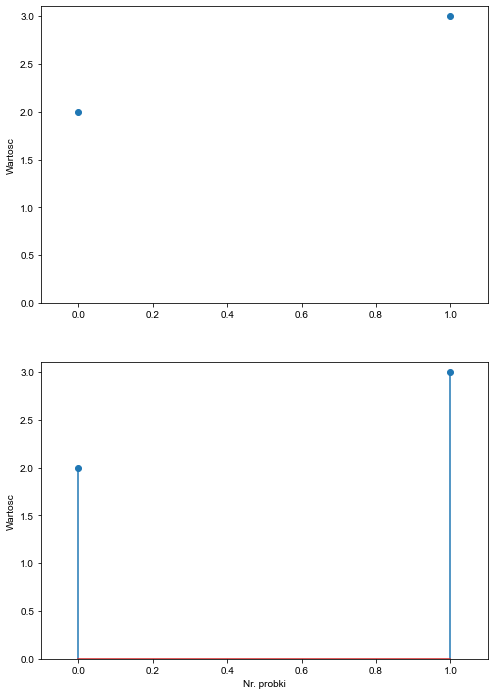

In [4]:
A = np.array([2,3])

plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
plt.plot(A,'o')
plt.xlim([-0.1, 1.1])
plt.ylim([0,3.1])
plt.ylabel('Wartosc')

plt.subplot(2,1,2)
plt.stem(A)
plt.xlim([-0.1, 1.1])
plt.ylim([0,3.1])
plt.ylabel('Wartosc')
plt.xlabel('Nr. probki')
plt.show()

### Zadanie: reprezentacja sygnałów 
* Przedstaw wektor $[0,0,1,1,1,0,0,0,1,1,1,0,0]$ jak w przykładzie powyżej.
* W ilo wymiarowej przestrzeni istnieje ten wektor?

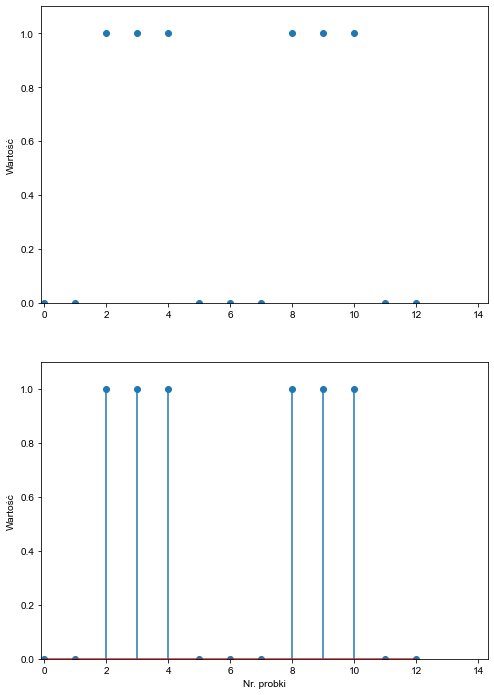

In [6]:
A = np.array([0,0,1,1,1,0,0,0,1,1,1,0,0])

plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
plt.plot(A,'o')
plt.xlim([-0.1, len(A)*1.1])
plt.ylim([0,np.max(A)+0.1])
plt.ylabel('Wartość')
 
plt.subplot(2,1,2)
plt.stem(A)
plt.xlim([-0.1, len(A)*1.1])
plt.ylim([0,np.max(A)*1.1])
plt.ylabel('Wartość')
plt.xlabel('Nr. probki')
plt.show()


### Dodawanie sygnałów
Wektory dodajemy sumując wartości odpowiadających sobie współrzędnych np.:

(0,1) + (1,0) = (1,1)

Tak samo dodajemy sygnały: punkt po punkcie.

### Zadanie: dodawanie sygnałów
Proszę:
* dodać sygnały: $x_1 = (1,2,2,1,3,2,1)$,  $x_2 = (2,1,2,1,2,1,2)$
* wypisać wynik i zilustrować za pomocą subplotów i  funkcji stem
* wygenerować dwa sygnały `sin` próbkowane 1000Hz, o czasie trwania 1s, i częstościach odpowiednio 10 i 20 Hz
* zilustruj oba sygnały i wynik ich dodawania



[3 3 4 2 5 3 3]


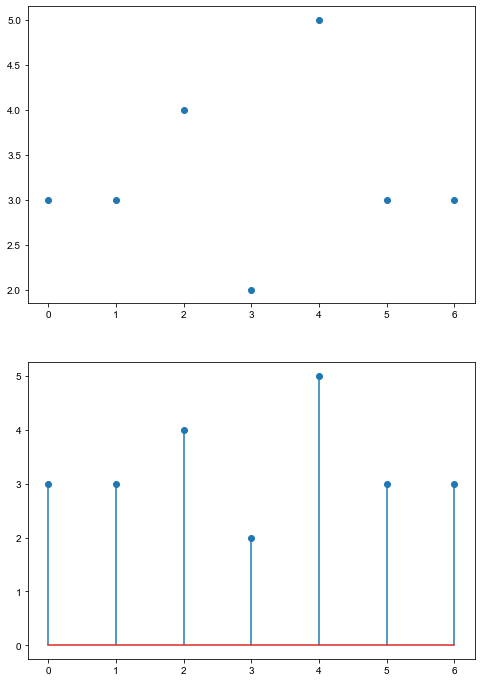

In [17]:
x1 = np.array([1,2,2,1,3,2,1])
x2 = np.array([2,1,2,1,2,1,2])
x = x1 + x2

print(x1+x2)

plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
plt.plot(x,'o')

plt.subplot(2,1,2)
plt.stem(x)

plt.show()

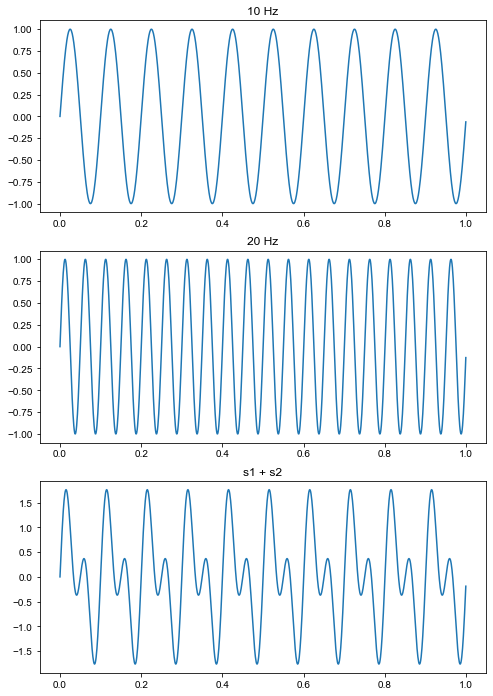

In [19]:
Fs =1000
dt = 1/Fs
t = np.arange(0,1,dt)

f1 = 10
s1 = np.sin(2*np.pi*f1*t)

f2 = 20
s2 = np.sin(2*np.pi*f2*t)

s = s1 + s2

plt.figure(figsize=(8,12))

plt.subplot(3,1,1)
plt.plot(t, s1)
plt.title("10 Hz")

plt.subplot(3,1,2)
plt.plot(t, s2)
plt.title("20 Hz")

plt.subplot(3,1,3)
plt.plot(t, s)
plt.title("s1 + s2")

plt.show()

### Mnożenie przez liczbę
Mnożenie wektora przez liczbę (skalar) robimy mnożąc kazdą ze współrzędnych przez tą liczbę, np.: 

    5*(1, 2)  = (5, 10).

Analogicznie mnożenie sygnału przez liczbę polega na pomnożeniu wartości każdej próbki przez tę liczbę. 

### Zadanie: mnożenie sygnałów przez liczbę:
* przedstaw przemnożenie sygnału $\sin(2 \pi 10 t)$ przez 5.

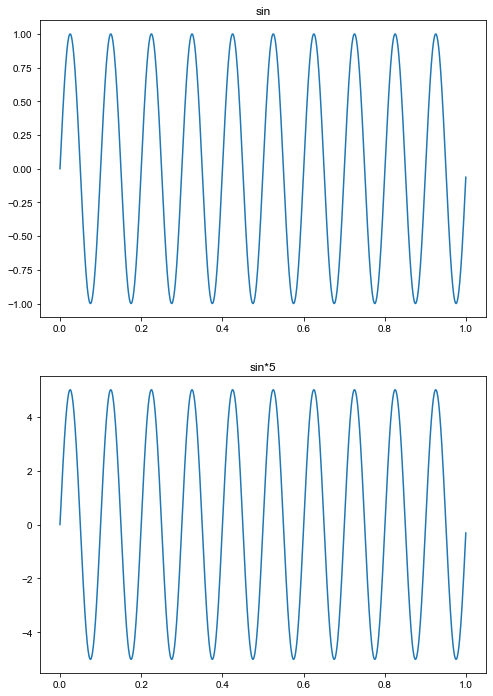

In [22]:
s = np.sin(2*np.pi*10*t)
sm = np.sin(2*np.pi*10*t)*5

plt.figure(figsize=(8,12))

plt.subplot(2,1,1)
plt.plot(t, s)
plt.title("sin")

plt.subplot(2,1,2)
plt.plot(t, sm)
plt.title("sin*5")

plt.show()

### Iloczyn skalarny
Iloczyn skalarny liczymy mnożąc przez sibie odpowiadające sobie współrzędne i dodając powstałe iloczyny:


| x1 	| -2 	| -2 	| 2 	| -1 	|-2|    |
|-----	|---	|---	|---	|---	|---|---|
| x2 	| -1 	| -1 	| 1 	| 1 	|0 	|   |
| y 	| 2 	| 2 	| 2 	| -1	|0  | =5|

### Zadanie: iloczyn skalarny sygnałów
Proszę zaimplementować to obliczenie za pomocą mnożenia i sumowania w pętli, a następnie za pomocą <tt>np.dot</tt>


In [31]:
x1 = [-2,-2,2,-1,-2]
x2 = [-1,-1,1,1,0]
y = []

for i in range(len(x1)):
    a = x1[i]*x2[i]
    y.append(a)
    wynik = np.sum(y)
print(wynik)

print(np.dot(x1,x2))

5
5


### Iloczyn skalarny jako miara podobieństwa
Przypomnijmy, że iloczyn skalarny można obliczyć tak:

$x \cdot y  = |x| |y| \cos( \phi)$

czyli:

$\frac{x}{|x|} \cdot \frac{y}{|y|}  =  \cos( \phi)$

Widać, że po znormalizowaniu wektorów iloczyn skalarny jest równy $\cos$ kąta pomiędzy wektorami. Gdy wektory są ortogonalne to jest 0, jeśli są równoległe to jest 1, w pozostałych przypadkach ma wartości pomiędzy -1, a 1 . Jest to miara podobieństwa między wektorami.
### Zadanie: cosinus kąta między sygnałami
a) Znormalizuj (tzn. podziel prze normę; <tt>np.linalg.norm</tt>), oblicz iloczyny skalarne i zilustruj wektory:
<center>$x1 = [-2, 0, 2, 2, 0, -2, -2, 0, 2, 2]$</center>

<center>$x2 = [-2, 0, 1, 2, 0, -1, -2, 0, 1, 2]$</center>

b) Znormalizuj, oblicz iloczyny skalarne i zilustruj wektory:
<center>$x1 = [-2, 0, 2,  2,  0,-2, -2, 0, 2, 2]$</center>

<center>$x2 = [ 1, 2, 0, -1, -2,  0,  1,  2, 0, -1]$</center>

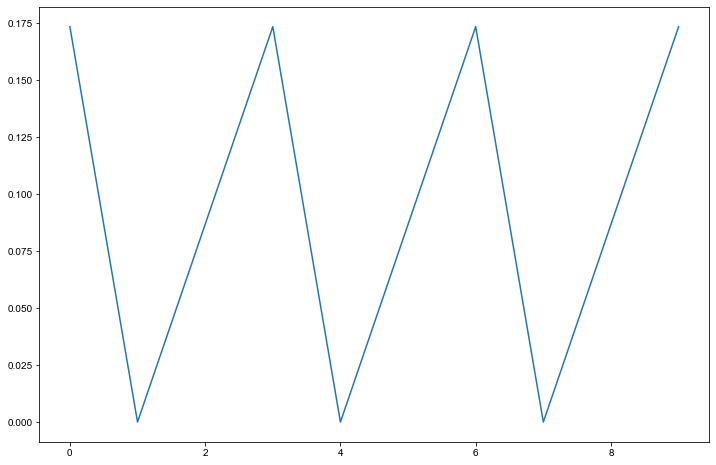

In [38]:
x1 = np.array([-2, 0, 2, 2, 0, -2,-2, 0, 2, 2])
x2 = np.array([-2, 0, 1, 2, 0, -1, -2, 0, 1, 2])

x1_norm = x1/np.linalg.norm(x1)
x2_norm = x2/np.linalg.norm(x2)

cos = x1_norm * x2_norm

plt.figure(figsize=(12,8))
plt.plot(cos)
plt.show()

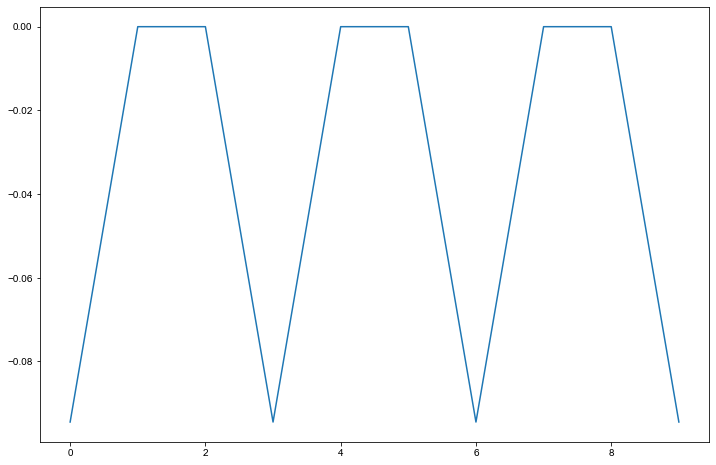

In [39]:
x1 = np.array([-2, 0, 2, 2, 0, -2,-2, 0, 2, 2])
x2 = np.array([1, 2, 0, -1, -2, 0, 1, 2, 0, -1])

x1_norm = x1/np.linalg.norm(x1)
x2_norm = x2/np.linalg.norm(x2)

cos = x1_norm * x2_norm

plt.figure(figsize=(12,8))
plt.plot(cos)
plt.show()